In [6]:
%pylab inline
import warnings
import numpy as np
import matplotlib.pyplot as plt

import rayopt as ro

# ignore matplotlib and numpy warning each other
warnings.simplefilter("ignore", FutureWarning)
# ignore floating point exceptions
np.seterr(divide="ignore", invalid="ignore")
# by default only print 4 significant digits
np.set_printoptions(precision=4)

Populating the interactive namespace from numpy and matplotlib


In [7]:
# It appears that rayopt requires distance rather than
# thickness quoted in patent literature
# So we have to move the thickness value one row down
# 
# The first surface represents the Object (O)
# The last surface represents the Image (I)

description = "Doublegauss-Nikkor-Haruo-58mmf1.4-JP2013-019993A"
columns = "type distance roc diameter material"
text = """
O 20      0   100 AIR
S 5.0 52.8577    47.2 1.74443/49.53
S 6.0   229.3475    47.2 AIR
S 0.1 40.3738 39.6 1.755/52.34
S 6.0 354.9744  39.6 1.48749/70.31
S 1.5 42.4134 35.1 AIR
S 4.1038 290.8467 34.0 1.68893/31.16
S 1.5 31.6359 33.0 AIR
A 6.0  0   29.0 AIR
S 6.0 -30.7873 30.0 1.72825/28.46
S 1.7 35.1427 33.5 1.883/40.66
S 7.0 -131.1407 33.5 AIR
S 0.1 118.7661 33.8 1.883/40.66
S 6.0 -44.2318 33.8 1.53172/48.78
S 1.5 44.2683 33.8 1.7443/49.53
S 6.0 -77.2943 33.8 AIR
I 38.7  0    42.42 AIR
"""


In [8]:
s = ro.system_from_text(text, columns.split(),
    description=description)
s.object.angle = np.deg2rad(20)

## Aspheric data
## Note 1.0 has been subtracted from k because rayopt adds it
s[1].conic = -0.4279
s[1].aspherics = [0, 1.10084E-07, 6.21998E-10, -4.25694E-13]
s[15].conic = 13.1597
s[15].aspherics = [0, 8.65514E-06, 4.15940E-09, 1.25812E-11, 1.22728E-14]

s.fields = 0, .7, 1.
#s.wavelengths = [587.5618e-9]

In [9]:
s.update()
#s.paraxial.resize()
print(s)

System: Doublegauss-Nikkor-Haruo-58mmf1.4-JP2013-019993A
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 20 deg
 Pupil:
   Pupil Distance: 34.4064
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 20.6598
Image:
 Radius: 21.2
 Update Radius: True
 Pupil:
   Pupil Distance: -68.8401
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 24.5107
Stop: 8
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S         20        inf        100         basic/air   1.000   1.000   89.30
 1 S          5      52.86       47.2                 -   1.744   1.744   49.53
 2 S          6      229.3       47.2         basic/air   1.000   1.000   89.30
 3 S        0.1      40.37       39.6                 -   1.755   1.755   52.34
 4 S          6        355       39.6                 -   1.487   1.487   70.31
 5 S        1.5      42.41       35.1         basic/air   1.000   1.000   89.30
 6 S     4.1038     

System: Doublegauss-Nikkor-Haruo-58mmf1.4-JP2013-019993A
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 20 deg
 Pupil:
   Pupil Distance: 34.4064
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 20.6598
Image:
 Radius: 21.2
 Update Radius: True
 Pupil:
   Pupil Distance: -68.8401
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 24.5107
Stop: 8
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S         20        inf        100         basic/air   1.000   1.000   89.30
 1 S          5      52.86       47.2                 -   1.744   1.744   49.53
 2 S          6      229.3       47.2         basic/air   1.000   1.000   89.30
 3 S        0.1      40.37       39.6                 -   1.755   1.755   52.34
 4 S          6        355       39.6                 -   1.487   1.487   70.31
 5 S        1.5      42.41       35.1         basic/air   1.000   1.000   89.30
 6 S     4.1038     

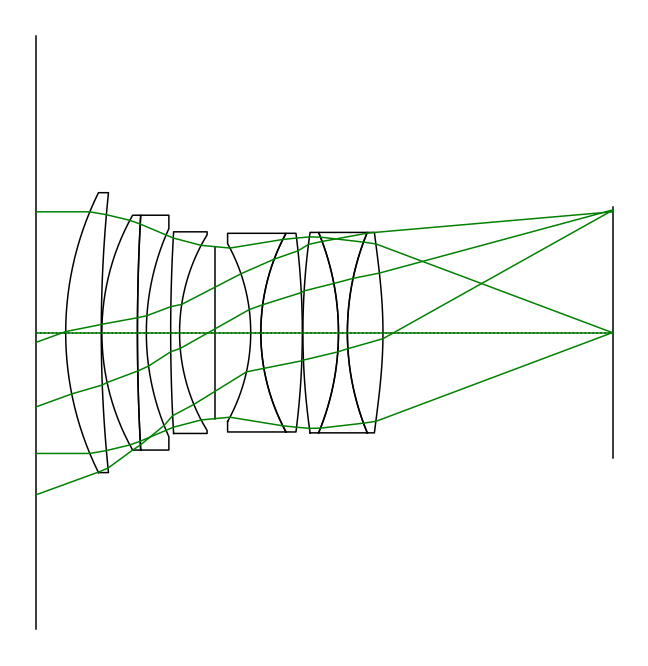

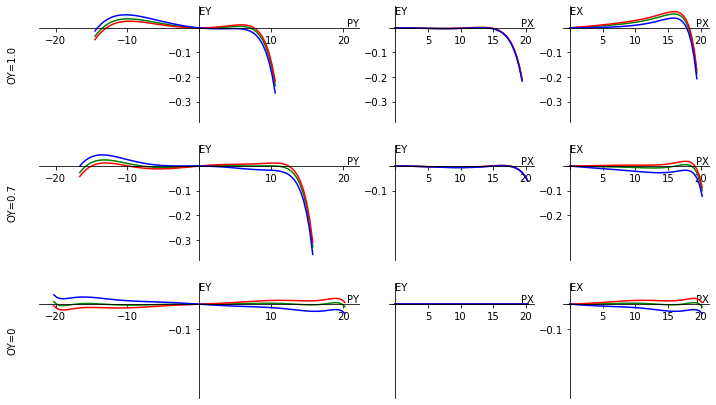

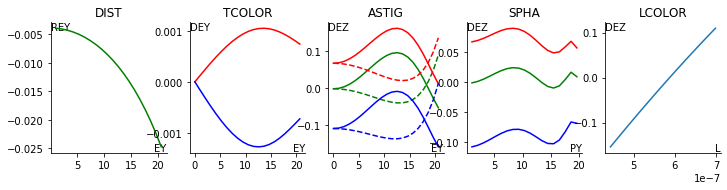

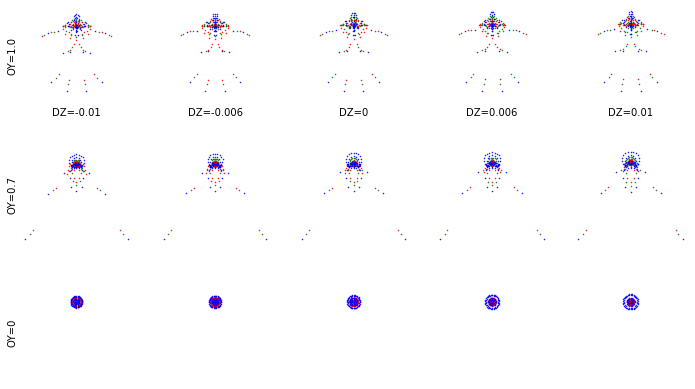

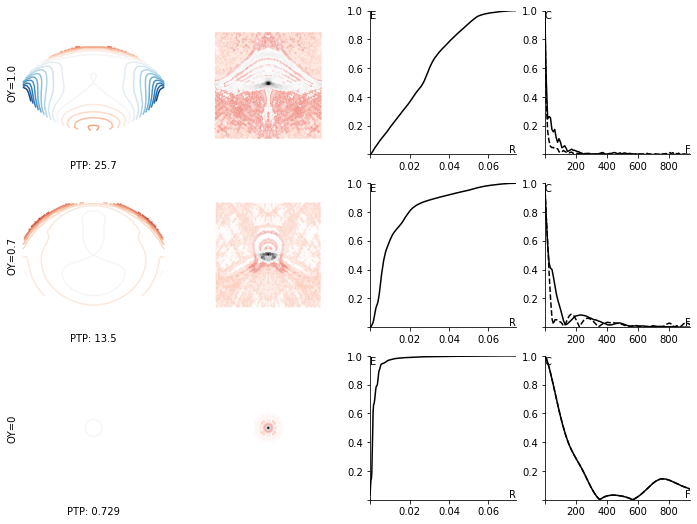

In [10]:
ro.Analysis(s)